In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Question 1. 

Let's explore clustering models on an artificial data set with five features.

In [2]:
data1 = pd.read_csv('data/hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA141B2B00>,
      dtype=object)

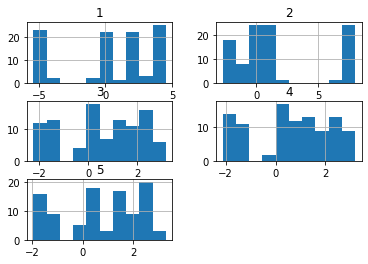

In [3]:
data1.hist()

#### a) First, guess the number of clusters we could have. 

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. 

#### c) Visualize the clustering result and color the points according to the labels obtained in part b). 

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? 

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). 

In [4]:
#a)I started with 2 cluster estimate  randomly since I see a concentration around 2 
n = 2

)from sklearn.cluster import KMeans

In [5]:
#b Using K-Means to cluster data again for n 2 

In [6]:
km=KMeans(random_state=324,n_clusters=2)
res=km.fit(data1)
print(res.labels_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
#c Visualize the clustering

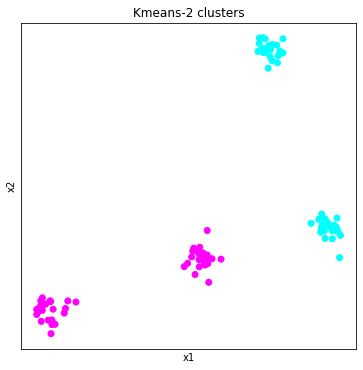

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

In [9]:
data1.iloc

In [10]:
#d  silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(data1)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.577195417571136
For n_clusters =3, the average silhouette_score is :0.7297516561326935
For n_clusters =4, the average silhouette_score is :0.8435353230318726
For n_clusters =5, the average silhouette_score is :0.6890604561532443


In [11]:
#best cluster is 4 custer based on  silouhette score 

In [12]:
n=4
 

km=KMeans(random_state=324,n_clusters=n)
res=km.fit(data1)
print(res.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


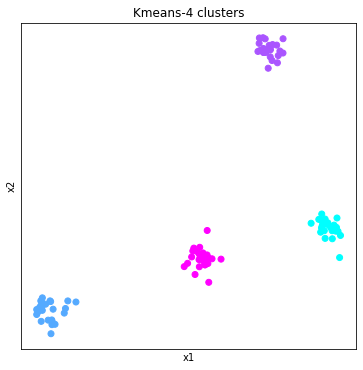

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

In [14]:
# d  Elbow method 
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

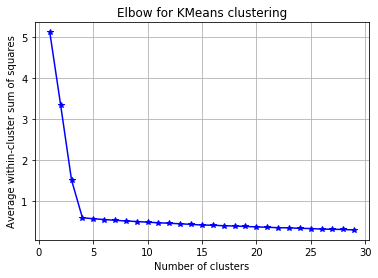

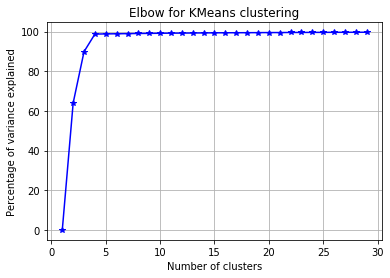

In [15]:
elbow(data1, range(1,30))

In [16]:
#Similarly to silouhette scored elbrow method gave the same result  with n=4  since adding another cluster doesn't give much better modeling of the data after 4th cluster
#Percentage of variance which  is the ratio of the between-group variance to the total variance and gives us inside of teh variances

In [17]:
import sklearn
sklearn.__version__

'0.21.2'

In [18]:
#eGaussian Method 

In [19]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.

n=4
gm=GaussianMixture(n_components=n,random_state=324)
res=gm.fit(data1)



Text(0.5, 1.0, 'Kmeans-4 clusters')

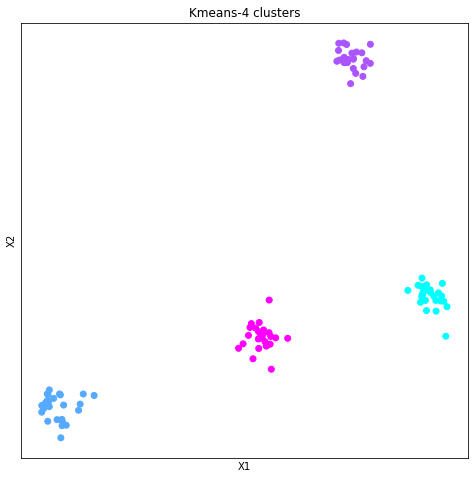

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c=res.predict(data1), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))


In [21]:
## Question 2. 

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are over 600 unique records in the file, but you want to determine the exact number. Try k-means with 600-680 clusters applying Elbow method and analyzing Silhouette scores.

In [22]:
data2 = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna(0)
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,0,0.0,40.733135,-73.954765,"(40.733135, -73.954765)",MANHATTAN AVENUE,0,0,...,Unspecified,0,0,0,3781862,PICK-UP TRUCK,PICK-UP TRUCK,0,0,0
1,10/31/2017,0:00,0,0.0,40.753510,-73.897900,"(40.75351, -73.8979)",0,0,0,...,Unspecified,0,0,0,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,0,0,0
2,10/31/2017,0:00,MANHATTAN,10036.0,40.759727,-73.991690,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,0,...,0,0,0,0,3781009,PASSENGER VEHICLE,0,0,0,0
3,10/31/2017,0:00,BROOKLYN,11207.0,0.000000,0.000000,0,LINDEN BOULEVARD,WILLIAMS AVENUE,0,...,Unspecified,0,0,0,3780501,PASSENGER VEHICLE,DS,0,0,0
4,10/31/2017,0:00,MANHATTAN,10030.0,40.815610,-73.943474,"(40.81561, -73.943474)",0,0,2309 7 AVENUE,...,Unspecified,Unspecified,0,0,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results. ) Briefly explain your approach. 
\* You may first have to factorize the data set, as it contains string variables.

#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  

In [23]:
#a)FACTORIZING
df = data2.apply(lambda x: pd.factorize(x)[0])


In [24]:
df.shape

(680, 29)

C:\Users\elm\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (618). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\elm\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (619). Possibly due to duplicate points in X.
  return_n_iter=True)


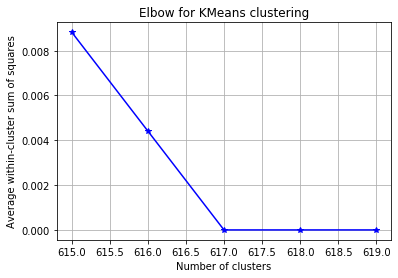

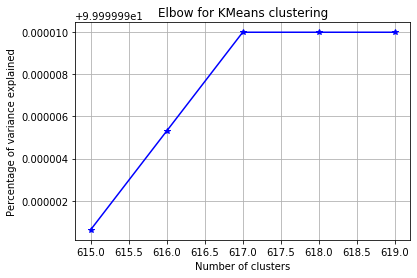

In [25]:
elbow(df, range(615,620))

In [26]:
#there is not much difference of variance after the 617th observation. So n=617

In [27]:
dff=df.drop_duplicates()
dff.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,1,1,0,0,0
2,0,0,1,1,2,2,2,2,1,0,...,1,0,0,0,2,2,2,0,0,0
3,0,0,2,2,3,3,3,3,2,0,...,0,0,0,0,3,2,3,0,0,0
4,0,0,1,3,4,4,4,1,0,1,...,0,1,0,0,4,1,1,1,0,0


In [28]:
dff.shape

(617, 29)

In [29]:
#according to elbrow 616 is the best value 

## Question 3.

### Real world exercise. 2012 "stop and frisk" data

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015.
Stop-and-frisk got increased attention in the 2016 presidential debate.

In [47]:
#load the data
data1=pd.read_csv("data/stop_2012.csv", index_col='zipcode')
data1.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_May,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,104.0,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,67.0,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,95.0,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,112.0,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,518.0,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [48]:
C

,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0
10037,271.0,38.0,32.0,143.0,248.0,448.0
10460,462.0,51.0,56.0,190.0,411.0,483.0
11224,157.0,27.0,37.0,97.0,282.0,575.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0


#### a) Find and visualize 5 zip codes with most stops

#### b) Filter the data to have at least 30 stop&frisk observations per zip code

#### c) We want to cluster the zip codes by the stops timeline data set. Choose the number of clusters k for Kmeans. Try both - Elbow method and Silhouette score - for that. In case the results are inconsistent provide reasoning for your choice of k. 

#### d) Visualize the k-means clustering for the k you've chosen

#### e) Repeat d) using Guassian Mixture model

In [32]:
#import numpy as np
#totalzipcodes=np.sum(data1, axis=1)
#a- print(totalzipcodes)

In [49]:
data_top = pd.DataFrame(data1.sum(axis=1), columns = ['Values'])
data_top_5 = data_top.nlargest(5,['Values'])

In [50]:
data1.head()

,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0
10037,271.0,38.0,32.0,143.0,248.0,448.0
10460,462.0,51.0,56.0,190.0,411.0,483.0
11224,157.0,27.0,37.0,97.0,282.0,575.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0


#a) Find and visualize 5 zip codes with most stops
data_top_5
columns

<Figure size 720x720 with 0 Axes>

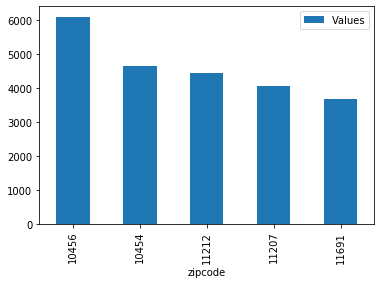

In [51]:
sum_stops =  pd.DataFrame(data1.sum(axis=1), columns = ['Values'])
sum_stops

largest_sum_stops = sum_stops.nlargest(5, ['Values']) 

plt.figure(figsize=(10,10))
largest_sum_stops.plot.bar()

In [52]:
import geopandas as gpd

C:\Users\elm\Anaconda3\lib\site-packages\geopandas\plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)
C:\Users\elm\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


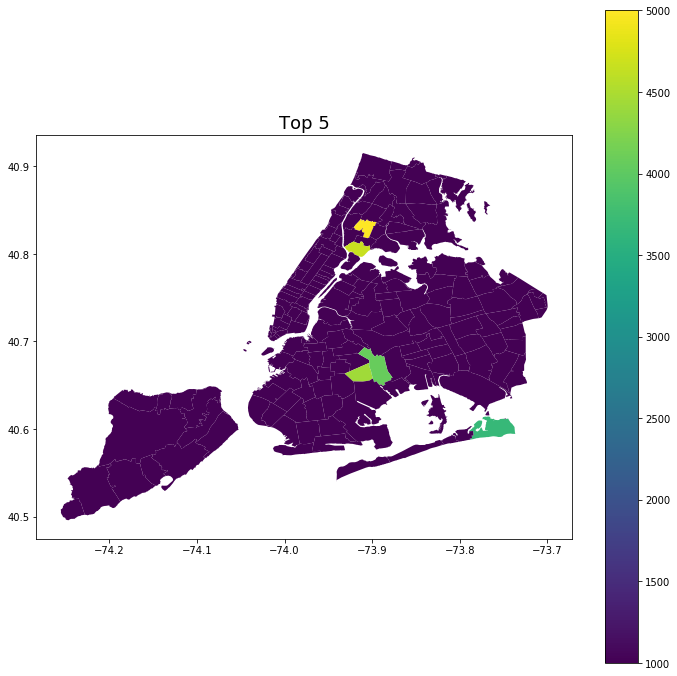

In [37]:
NYC=gpd.read_file('data/NY.shp')
NYC['top'] = NYC.zipcode.map(data_top_5['Values'])
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Top 5", fontsize=18)
NYC.plot(axes=ax, column='top', legend = True,vmax=5000, vmin=1000)
plt.show()

In [59]:
#b-Filter the data to have at least 30 stop&frisk observations per zip code
data1 = data1.loc[data1.min(axis=1)>=30]
#data1 = (sum_stops.Values>=30)
#sum_stops_subset = sum_stops.loc[data1].copy()
#sum_stops_subset
data1

,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0
10037,271.0,38.0,32.0,143.0,248.0,448.0
10460,462.0,51.0,56.0,190.0,411.0,483.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0
11203,448.0,83.0,75.0,249.0,328.0,623.0
10452,407.0,43.0,40.0,211.0,474.0,563.0
10455,293.0,37.0,55.0,124.0,283.0,563.0
10031,548.0,50.0,104.0,239.0,382.0,919.0
10029,426.0,35.0,45.0,125.0,479.0,689.0


In [68]:
#silhouette
range_n_clusters = range(2,7)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(data1)
 

    #report average Silhouette score
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5840482914007658
For n_clusters =3, the average silhouette_score is :0.42651835433761526
For n_clusters =4, the average silhouette_score is :0.42410166415292705
For n_clusters =5, the average silhouette_score is :0.3897925081656228
For n_clusters =6, the average silhouette_score is :0.30625671444818797


In [61]:


#Trying silhoutte score 

#range_n_clusters = range(2,7)
#for n_clusters in range_n_clusters: #try different numbers of clusters
    #km = KMeans(n_clusters=n_clusters, random_state=324)
    #cluster_labels = km.fit_predict(data1)

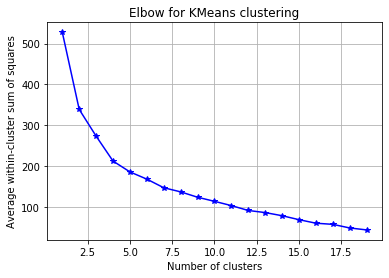

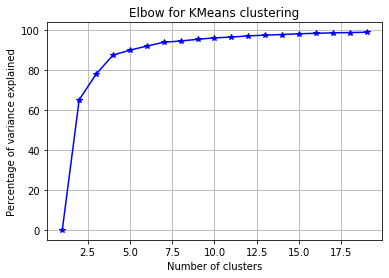

In [79]:
elbow(data1, range(1,20))

In [80]:
## silouhette is highest with k=2 samle with elbow where highest variance is explained 

In [108]:
n=2

km=KMeans(random_state=417,n_clusters=n)
res=km.fit(data1)
print(res.labels_)

[1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1]


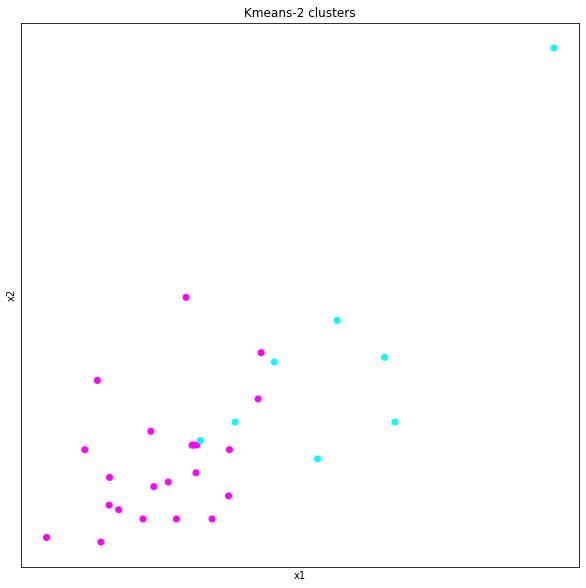

In [109]:
#Plotting the K-Means

plt.figure(figsize=(10,10))

plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

In [106]:
from sklearn.mixture import GaussianMixture 

n=2
gm=GaussianMixture(n_components=n,random_state=417)
res1=gm.fit(data1)

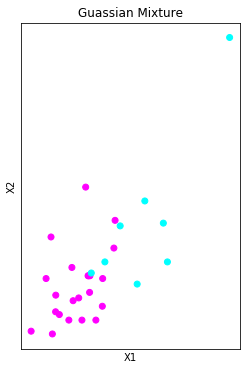

In [107]:
#plotting kmeans 

plt.figure(figsize=(18,6))

plt.subplot(1,4,3)
plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c=res1.predict(data1), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

plt.show()
